# AI vs Human Content detection - Machine Learning & Deep Learning 
## EDA and data visualisation

In this notebook we will explore the data and analyse every column and its contents in detail, deciding on a strategy when doing prepoccesing and model training and testing

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [80]:
Data=pd.read_csv("../data/ai_human_content_detection_dataset.csv")
Data.shape

(1367, 17)

In [81]:
Data.head(5)

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


In [82]:
Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_content          1367 non-null   object 
 1   content_type          1367 non-null   object 
 2   word_count            1367 non-null   int64  
 3   character_count       1367 non-null   int64  
 4   sentence_count        1367 non-null   int64  
 5   lexical_diversity     1367 non-null   float64
 6   avg_sentence_length   1367 non-null   float64
 7   avg_word_length       1367 non-null   float64
 8   punctuation_ratio     1367 non-null   float64
 9   flesch_reading_ease   1288 non-null   float64
 10  gunning_fog_index     1332 non-null   float64
 11  grammar_errors        1367 non-null   int64  
 12  passive_voice_ratio   1336 non-null   float64
 13  predictability_score  1367 non-null   float64
 14  burstiness            1367 non-null   float64
 15  sentiment_score      

In [83]:
Data.isna().sum().sort_values(ascending=False)


flesch_reading_ease     79
sentiment_score         54
gunning_fog_index       35
passive_voice_ratio     31
text_content             0
content_type             0
word_count               0
character_count          0
sentence_count           0
punctuation_ratio        0
avg_word_length          0
avg_sentence_length      0
lexical_diversity        0
grammar_errors           0
predictability_score     0
burstiness               0
label                    0
dtype: int64

In [84]:
Data = Data.dropna()


In [85]:
Data.shape

(1179, 17)

In [86]:
missing_values = Data.apply(lambda x: x.isnull().sum().sum())
print(missing_values)


text_content            0
content_type            0
word_count              0
character_count         0
sentence_count          0
lexical_diversity       0
avg_sentence_length     0
avg_word_length         0
punctuation_ratio       0
flesch_reading_ease     0
gunning_fog_index       0
grammar_errors          0
passive_voice_ratio     0
predictability_score    0
burstiness              0
sentiment_score         0
label                   0
dtype: int64


In [87]:
Data.describe() 

,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
count,1179.00000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,140.09754,939.950806,25.575064,0.967592,5.492392,5.721349,0.027406,52.093079,7.557286,1.567430,0.149918,63.141077,0.427259,-0.002566,0.500424
std,98.36175,660.868244,18.057071,0.026207,0.452961,0.286955,0.002866,10.564724,1.865698,1.932518,0.056925,28.323529,0.199299,0.591635,0.500212
min,3.00000,14.000000,1.000000,0.875000,3.000000,4.000000,0.019400,-50.010000,1.200000,0.000000,0.050000,20.030000,0.101900,-0.999300,0.000000
25%,59.00000,400.500000,11.000000,0.951750,5.290000,5.590000,0.026100,47.660000,6.620000,0.000000,0.099150,39.290000,0.250600,-0.523950,0.000000
50%,130.00000,882.000000,24.000000,0.969100,5.490000,5.710000,0.027200,52.170000,7.510000,1.000000,0.150400,57.260000,0.413300,-0.006300,1.000000
75%,192.00000,1287.500000,35.000000,0.989000,5.700000,5.830000,0.028400,57.275000,8.395000,3.000000,0.200200,87.360000,0.592000,0.520600,1.000000
max,443.00000,2966.000000,83.000000,1.000000,8.000000,8.330000,0.071400,98.870000,27.870000,10.000000,0.250000,119.930000,0.798400,0.995900,1.000000


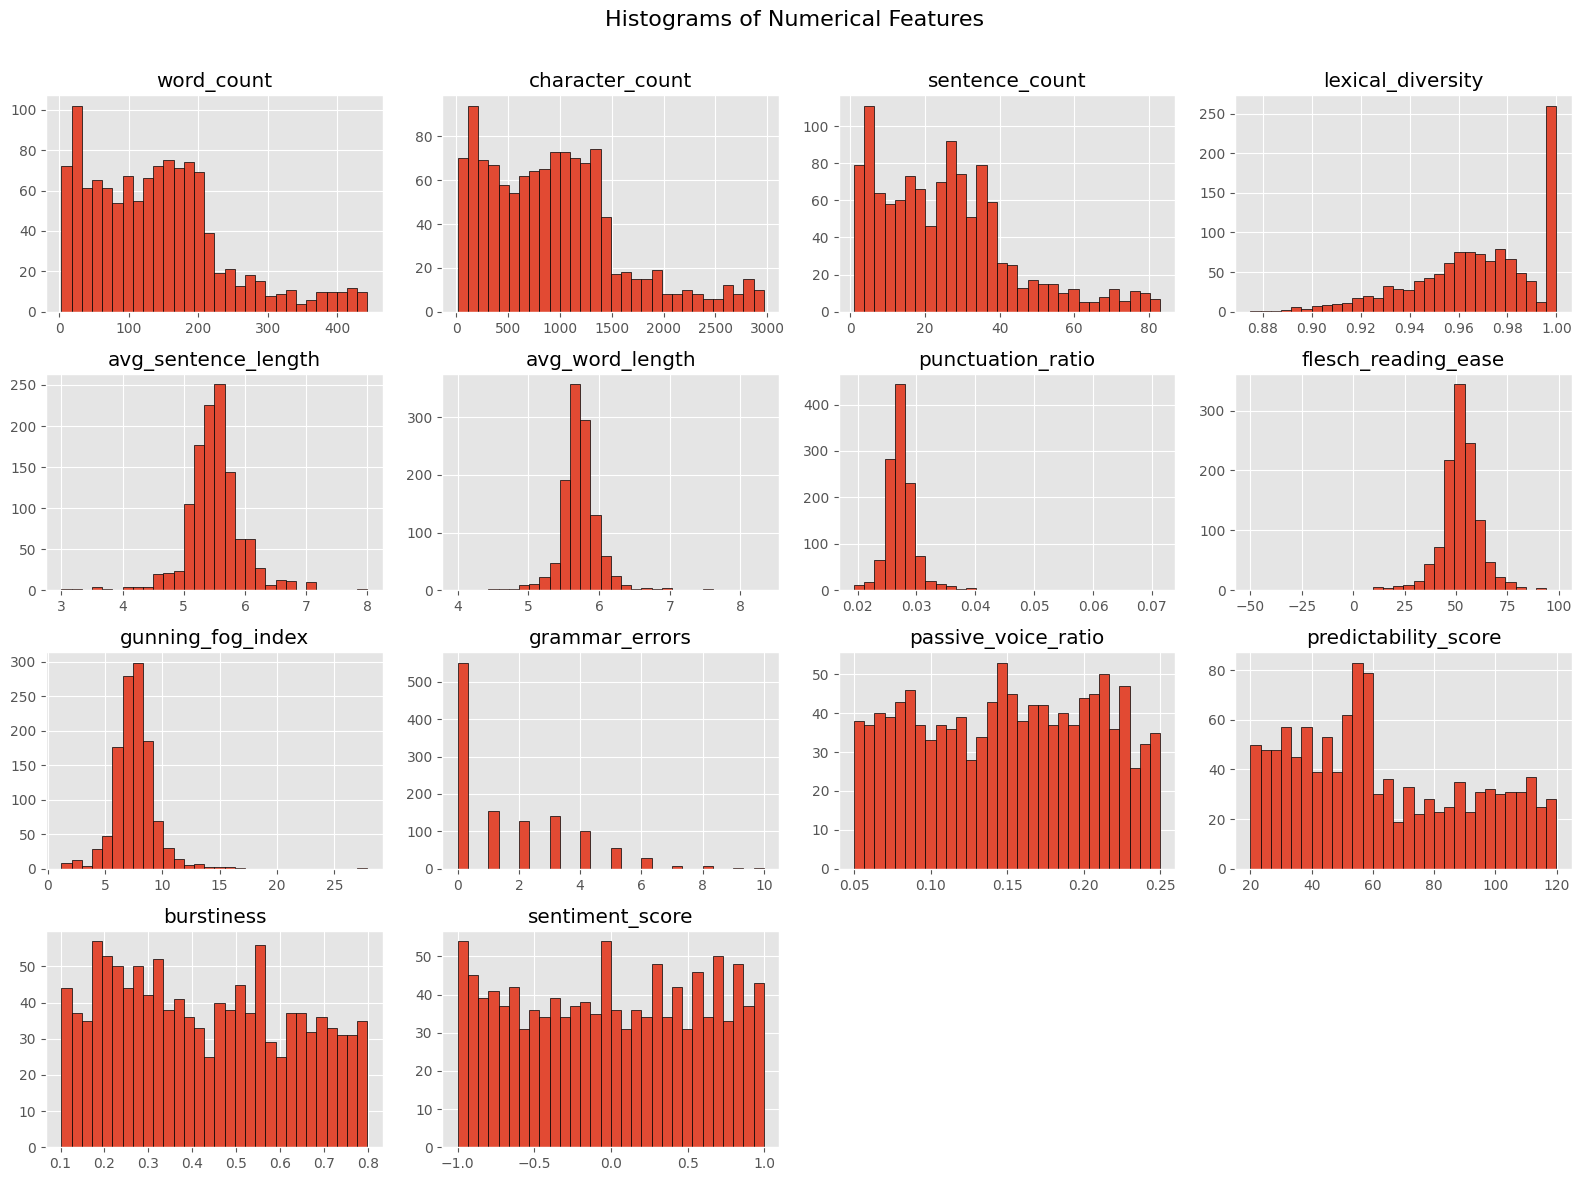

In [88]:
# Histograms for all numerical features
Data_h = Data.drop(columns=['label'])  
Data_h.select_dtypes(include='number').hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

in these previous graphs we see histograms revealing thee count on each numerical feature excluding content type because of its cathegorical nature and label because we will use a separe chart for its visualisation

C:\Users\david\AppData\Local\Temp\ipykernel_9932\3260253852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="label", data=Data, palette="Set1")


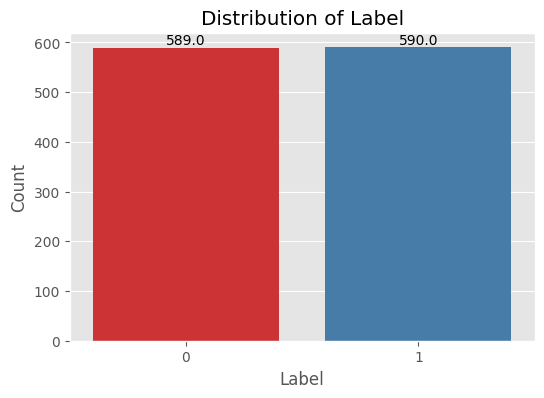

In [102]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="label", data=Data, palette="Set1")

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Distribution of Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

We are able to see that the dataset is balanced, mainly because of its artificial nature but nevertheless the results of our model testing on real life samples will show how effective training on so-called artificial data actually is. The balance of this dataset is quite helpfull when training models in order to achieve better results on classification 

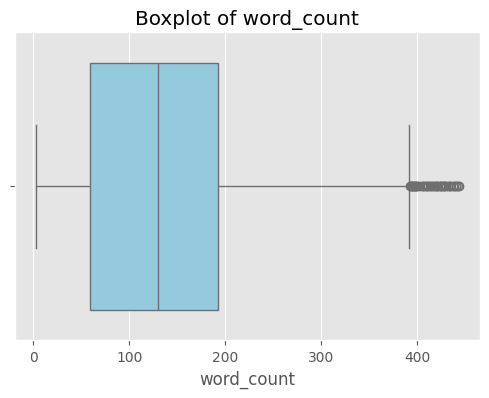

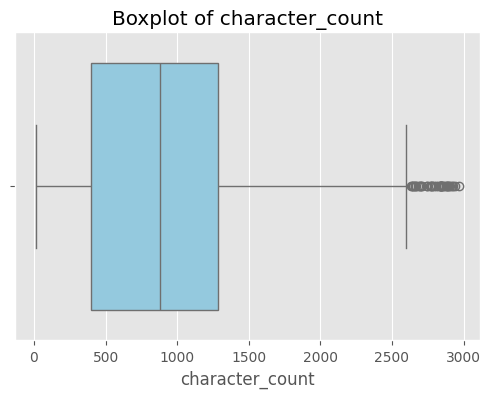

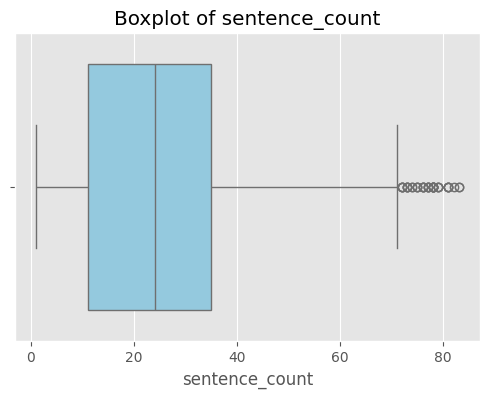

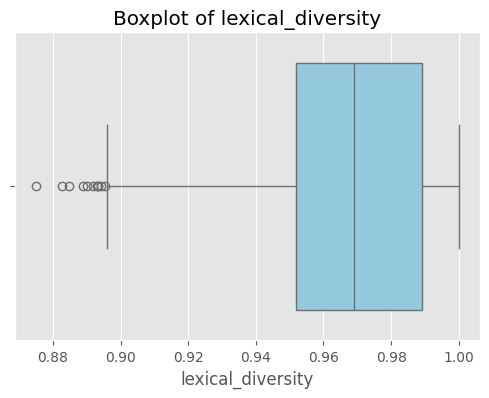

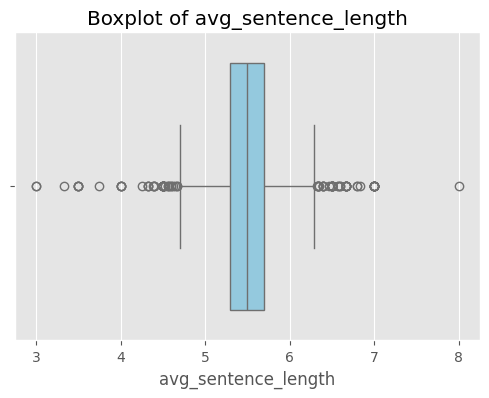

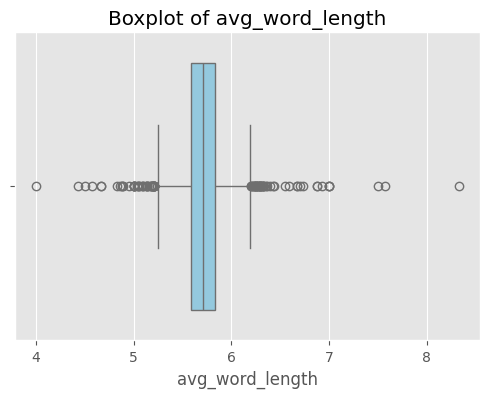

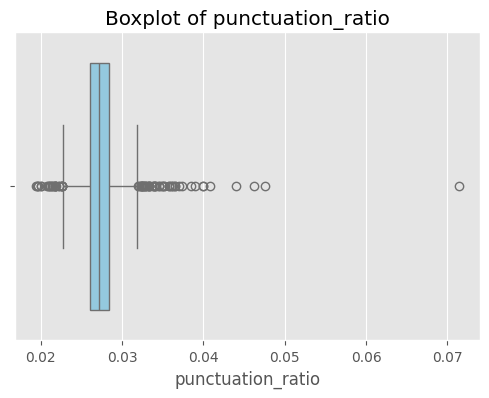

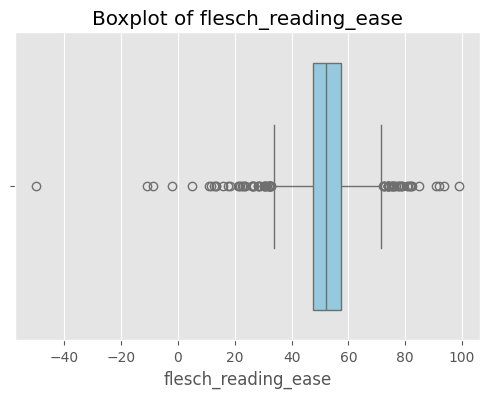

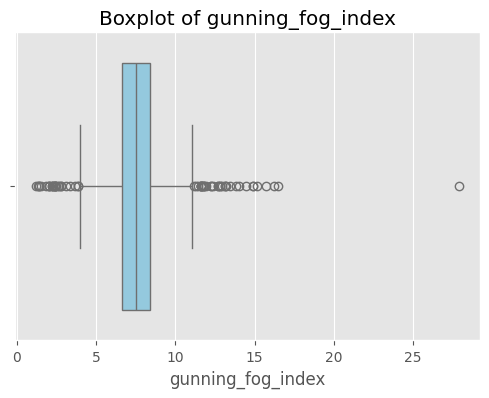

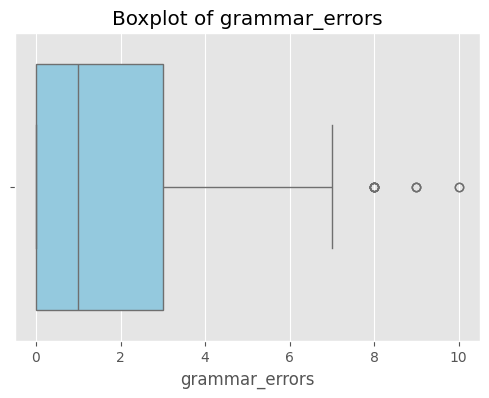

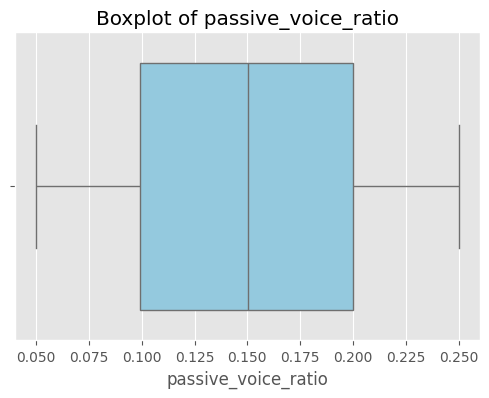

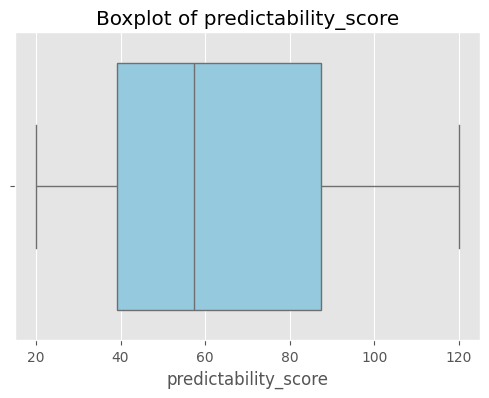

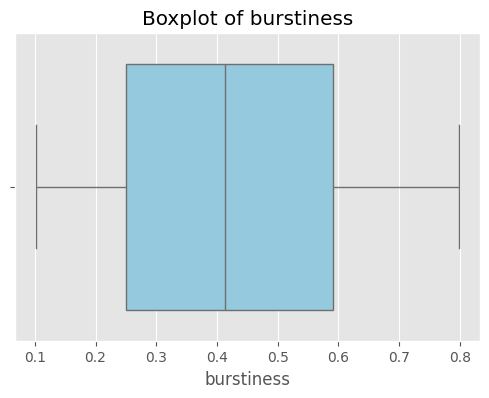

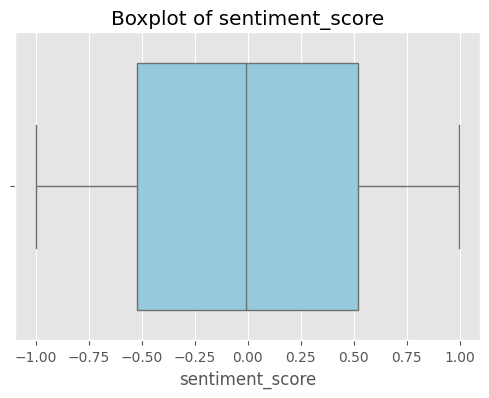

In [89]:
# Boxplots for all numerical features

num_cols = Data.select_dtypes(include='number').columns
num_cols = num_cols.drop('label')

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=Data[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

The previous boxplots give us an insight into the numerical features and their distributon, one key takeaway is that most text have low grammar errors, which makes this dataset ideal for training as Ai is getting significantly better at generating and replecating human text.

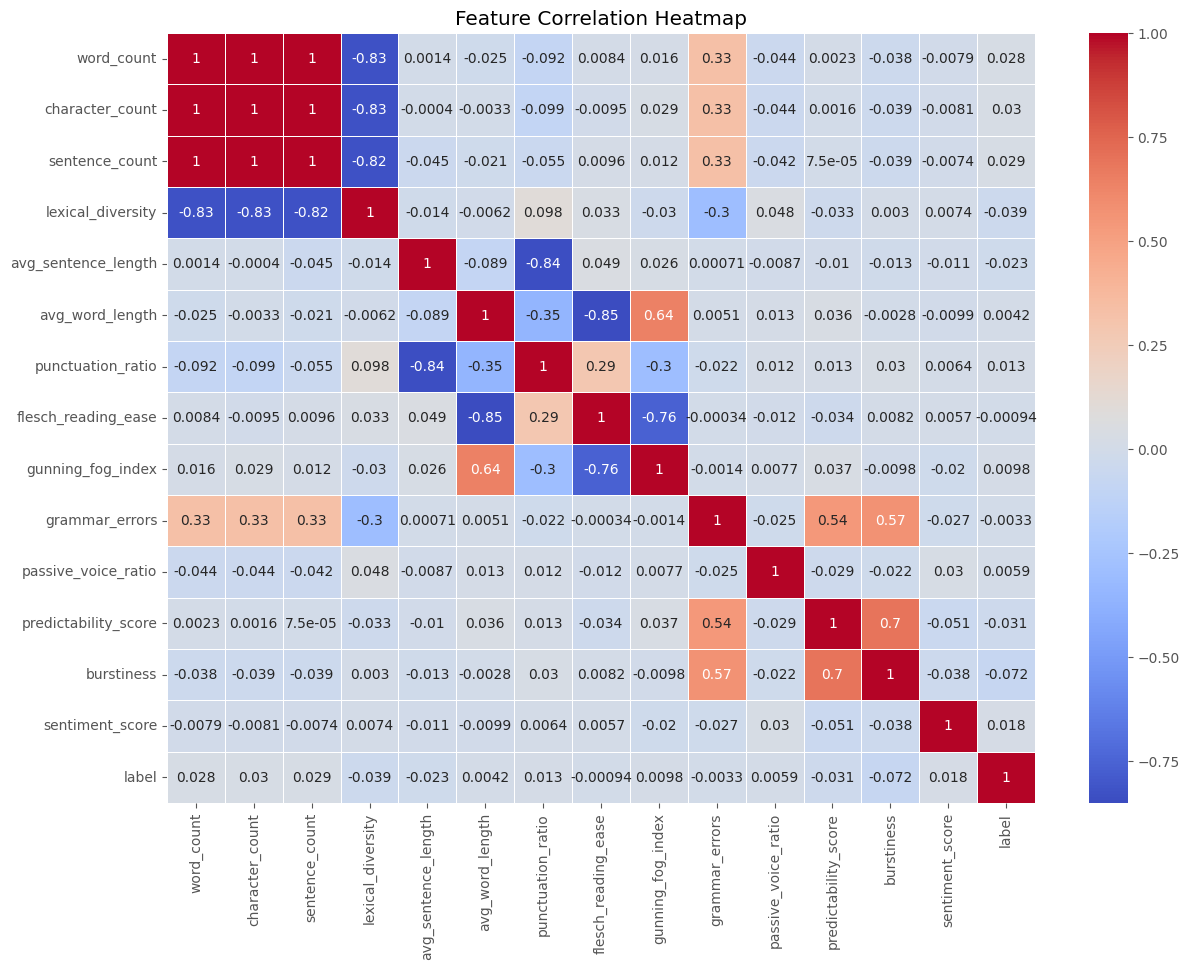

In [90]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr_matrix = Data.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

The correlation matrix shows that almoost all feeature show little correlation with the target column label, but because of thee low volume of features, all of them should be kept during the training proccess. Also, a high correlation is shown between the counts of words, characters and sentences but i would refrain from removing any one of them.

C:\Users\david\AppData\Local\Temp\ipykernel_9932\3729116646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='content_type', data=Data, order=Data['content_type'].value_counts().index, palette="Set2")


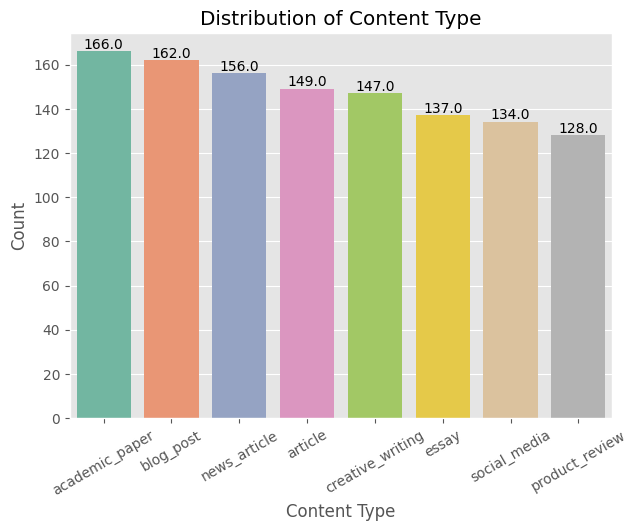

In [103]:
# Bar plot for content_type distribution
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='content_type', data=Data, order=Data['content_type'].value_counts().index, palette="Set2")


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution of Content Type')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

From the bar plot of the different types of content type we can visalise that its pretty evenly diistributed and no one type of content will sway the models decision on the labeling

Top 3 features correlated with content_type: ['character_count', 'word_count', 'sentence_count']


C:\Users\david\AppData\Local\Temp\ipykernel_9932\2729665576.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='content_type_encoded', y=feature, data=Data, alpha=0.6, ax=axes[0], jitter=True, palette="Set2")
C:\Users\david\AppData\Local\Temp\ipykernel_9932\2729665576.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='content_type_encoded', y=feature, data=Data, ax=axes[1], palette="Set2")


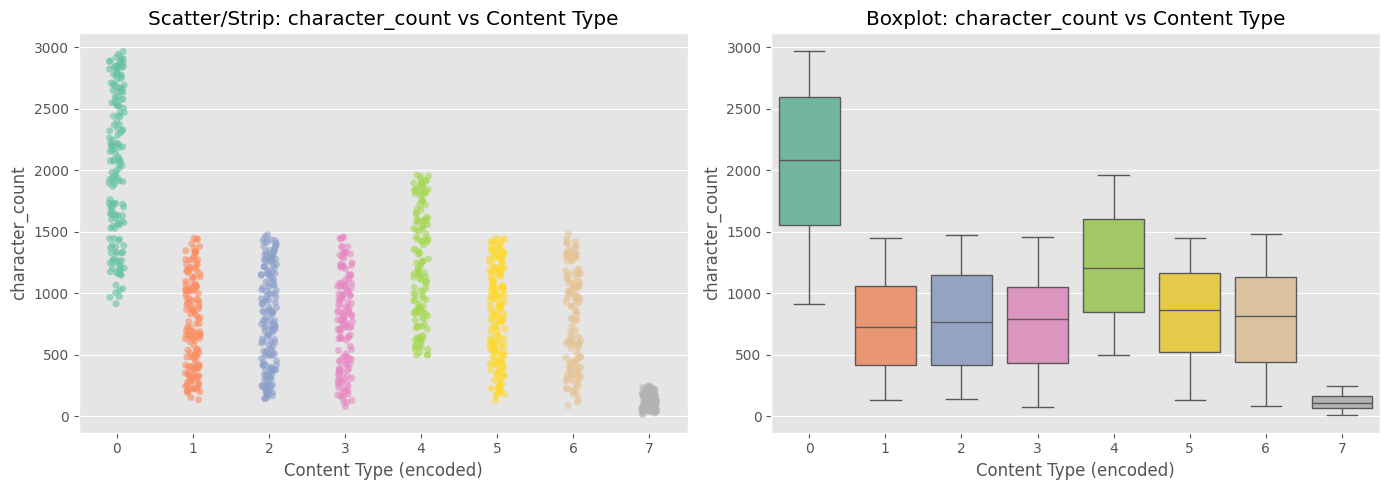

C:\Users\david\AppData\Local\Temp\ipykernel_9932\2729665576.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='content_type_encoded', y=feature, data=Data, alpha=0.6, ax=axes[0], jitter=True, palette="Set2")
C:\Users\david\AppData\Local\Temp\ipykernel_9932\2729665576.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='content_type_encoded', y=feature, data=Data, ax=axes[1], palette="Set2")


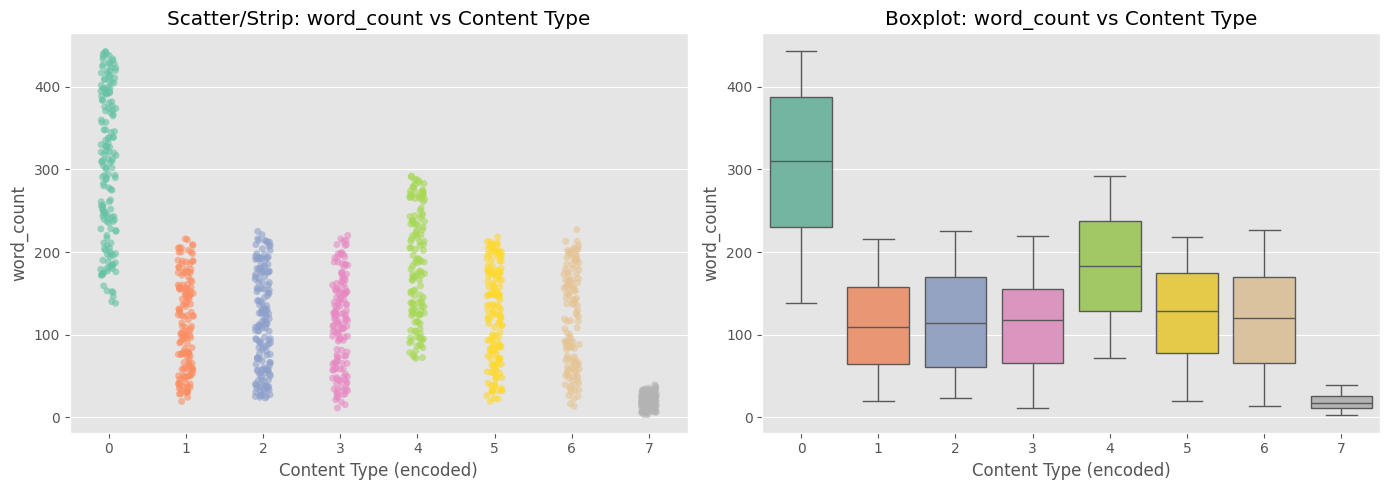

C:\Users\david\AppData\Local\Temp\ipykernel_9932\2729665576.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='content_type_encoded', y=feature, data=Data, alpha=0.6, ax=axes[0], jitter=True, palette="Set2")
C:\Users\david\AppData\Local\Temp\ipykernel_9932\2729665576.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='content_type_encoded', y=feature, data=Data, ax=axes[1], palette="Set2")


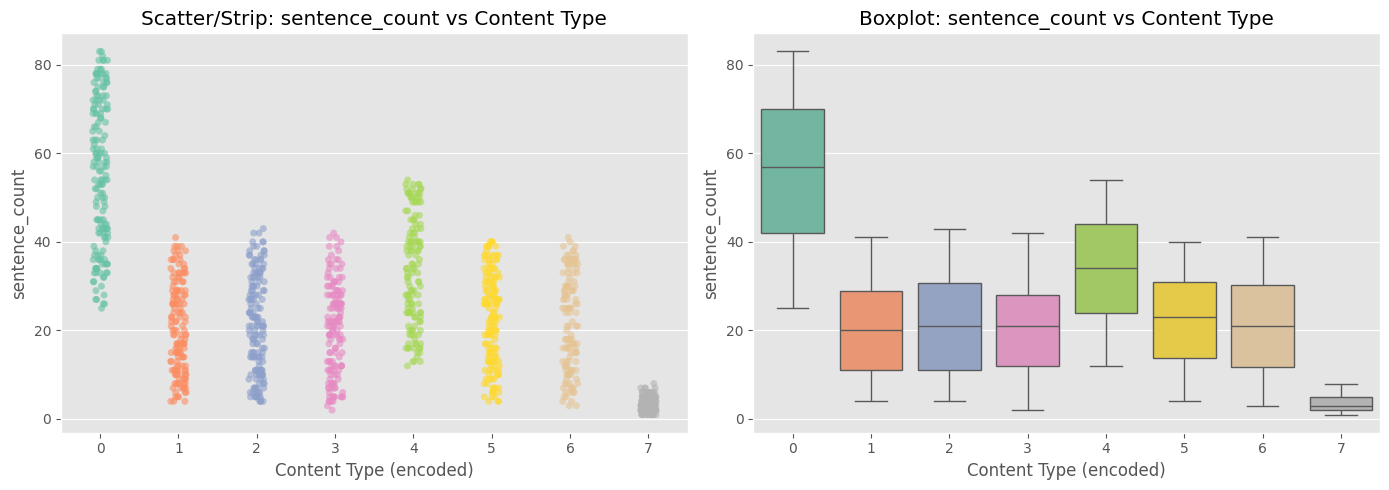

In [104]:
# Encode content_type
Data['content_type_encoded'] = Data['content_type'].astype('category').cat.codes

# Correlation matrix
corr_matrix = Data.corr(numeric_only=True)

# Top 3 features most correlated with content_type
important_features = corr_matrix['content_type_encoded'].abs().sort_values(ascending=False).index[1:4]
print("Top 3 features correlated with content_type:", important_features.tolist())

# Scatter + Boxplots for better visualization
for feature in important_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Scatter with jitter
    sns.stripplot(x='content_type_encoded', y=feature, data=Data, alpha=0.6, ax=axes[0], jitter=True, palette="Set2")
    axes[0].set_title(f"Scatter/Strip: {feature} vs Content Type")
    axes[0].set_xlabel("Content Type (encoded)")
    axes[0].set_ylabel(feature)

    # Boxplot
    sns.boxplot(x='content_type_encoded', y=feature, data=Data, ax=axes[1], palette="Set2")
    axes[1].set_title(f"Boxplot: {feature} vs Content Type")
    axes[1].set_xlabel("Content Type (encoded)")
    axes[1].set_ylabel(feature)

    plt.tight_layout()
    plt.show()

The previous charts demonstrate the dispeercity of the different counts of words, charactes and sentences among the sontent types. We can see that most of them have smilar distribtions of theese three most correlated features the outliers being academic papers which have a higher frequency as expected and product reviews that have a significantly lower frequency that is also expected because of the nature of the text itself.

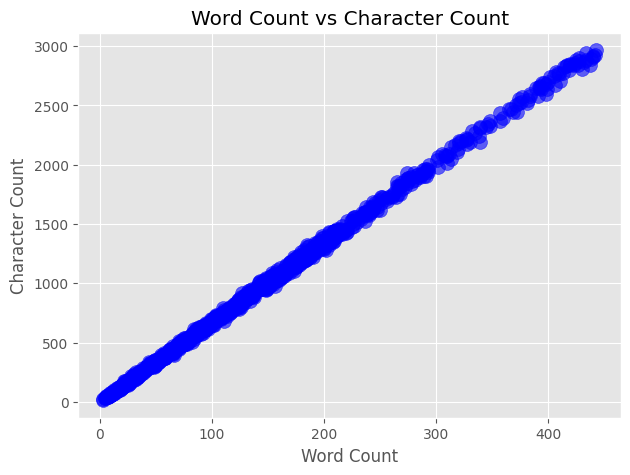

In [93]:
plt.style.use("ggplot")

plt.figure(figsize=(7,5))
plt.scatter(Data["word_count"], Data["character_count"], c="blue", s=100, alpha=0.6)
plt.xlabel("Word Count")
plt.ylabel("Character Count")
plt.title("Word Count vs Character Count")
plt.show()

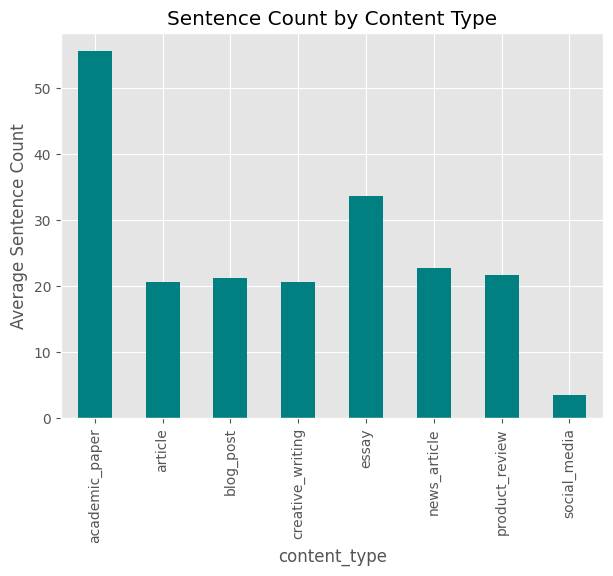

In [94]:

plt.figure(figsize=(7,5))
Data.groupby("content_type")["sentence_count"].mean().plot(kind="bar", color="teal")
plt.ylabel("Average Sentence Count")
plt.title("Sentence Count by Content Type")
plt.show()

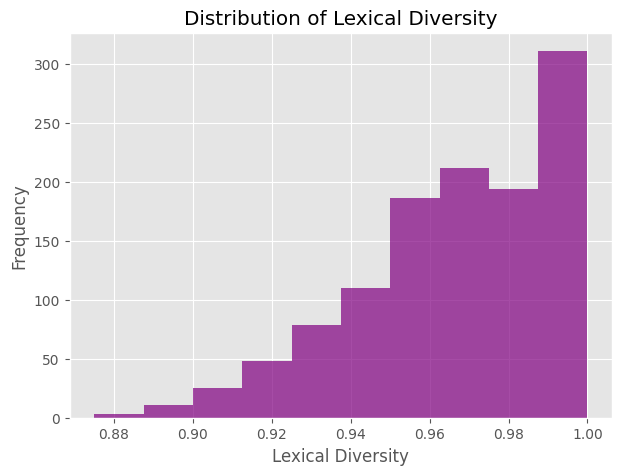

In [95]:
plt.figure(figsize=(7,5))
Data["lexical_diversity"].plot(kind="hist", bins=10, color="purple", alpha=0.7)
plt.xlabel("Lexical Diversity")
plt.title("Distribution of Lexical Diversity")
plt.show()

We can conclude that most of text or roughly above 1000 texts have high lexical divercity or a rich vocabulary or so to say

C:\Users\david\AppData\Local\Temp\ipykernel_9932\2585657360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="content_type", y="flesch_reading_ease", data=Data, palette="Set2")


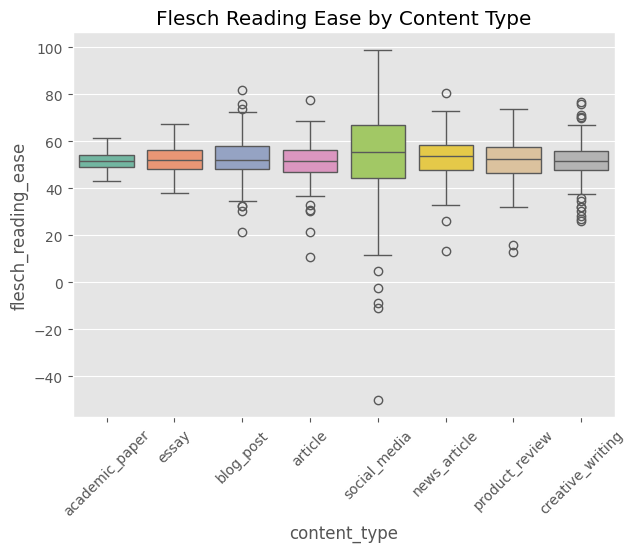

In [105]:
plt.figure(figsize=(7,5))
sns.boxplot(x="content_type", y="flesch_reading_ease", data=Data, palette="Set2")
plt.title("Flesch Reading Ease by Content Type")
plt.xticks(rotation=45)
plt.show()

Most texts have a flesch reading ease score of around fifty meaning they are not really easy to read but not difficult aswell they are just in the middle which gives a good camouflage when trying to descifer whether a written artical is artificial or human. This gives another layer to the detection problem, but a challenge is always welcome.

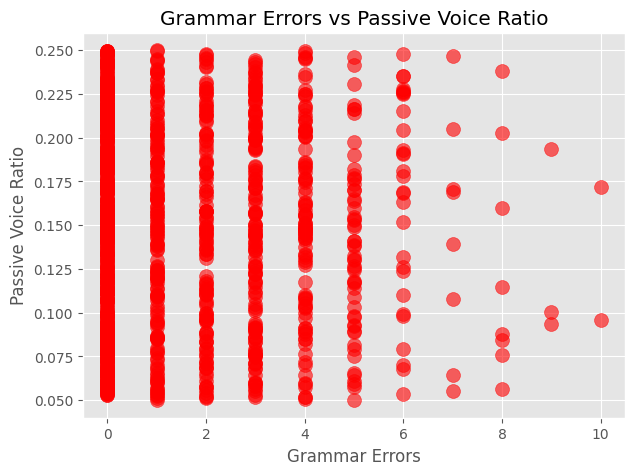

In [106]:
plt.figure(figsize=(7,5))
plt.scatter(Data["grammar_errors"], Data["passive_voice_ratio"], c="red", s=100, alpha=0.6)
plt.xlabel("Grammar Errors")
plt.ylabel("Passive Voice Ratio")
plt.title("Grammar Errors vs Passive Voice Ratio")
plt.show()

It is also good to note that grammar errors occur in all frequencies of the passive voice usage, which also doesn't give a clear indicator on a trend that can be followed to detect text origin, so in conclusion the data has high entropy. 

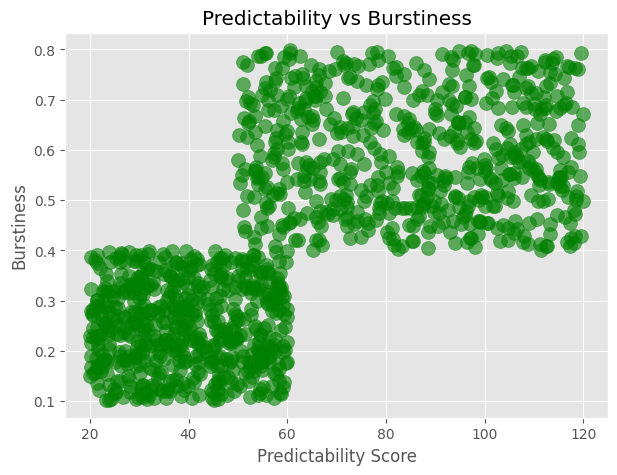

In [98]:
plt.figure(figsize=(7,5))
plt.scatter(Data["predictability_score"], Data["burstiness"], c="green", s=100, alpha=0.6)
plt.xlabel("Predictability Score")
plt.ylabel("Burstiness")
plt.title("Predictability vs Burstiness")
plt.show()

This scatter plot shows the relation between burstiness and predictabiity score and it gives expected information. Text with high predicatability scores have also a large burstiness coeficient.

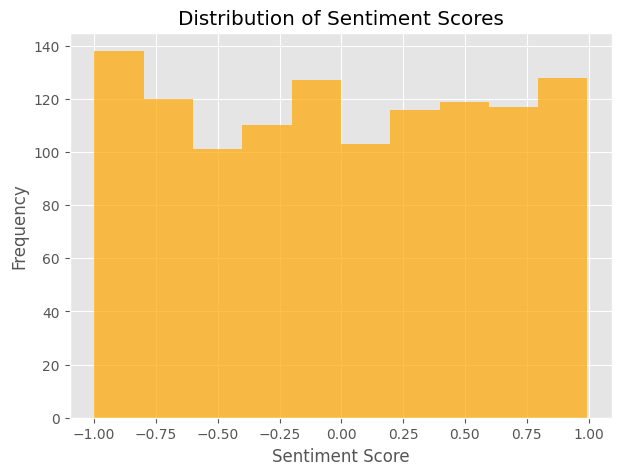

In [99]:
plt.figure(figsize=(7,5))
Data["sentiment_score"].dropna().plot(kind="hist", bins=10, color="orange", alpha=0.7)
plt.xlabel("Sentiment Score")
plt.title("Distribution of Sentiment Scores")
plt.show()

It can also be noted that the sentiment scores a pretty uniformly distributed among texts, which will remove bieas from the model's learning proccess

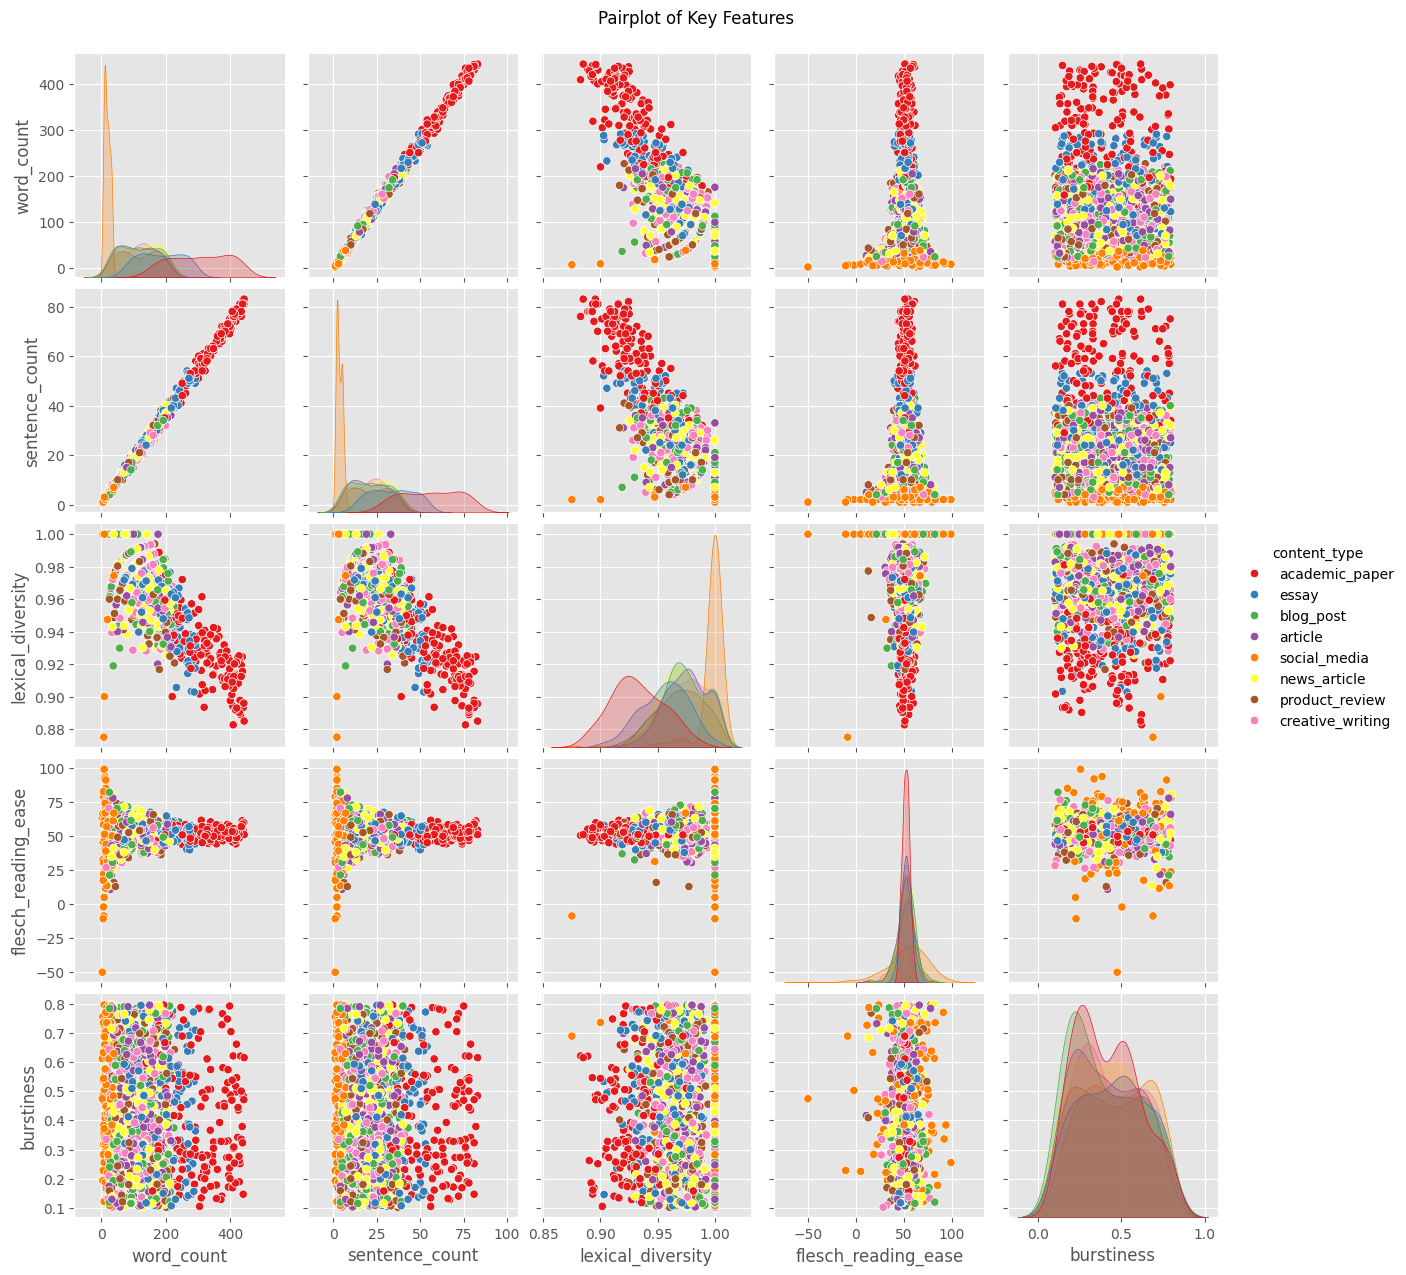

In [100]:
sns.pairplot(Data.drop(columns=["text_content"]), 
             vars=["word_count", "sentence_count", "lexical_diversity", 
                   "flesch_reading_ease", "burstiness"], 
             hue="content_type", palette="Set1", diag_kind="kde")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

From the pairplots we can see that almost all of these feature can give rought differentiation between the different content types, meaning clusters are a bit messy and there could be a absolute correlation between the features included and the content type itself, howeover one content type seems to stand out and can be easyly identifed by any of these feautre pairs and that is the academic paper showing signs of high word and sentence cout, high burstiness, a relativly strong lexical diversity with a medim flesch reading ease score

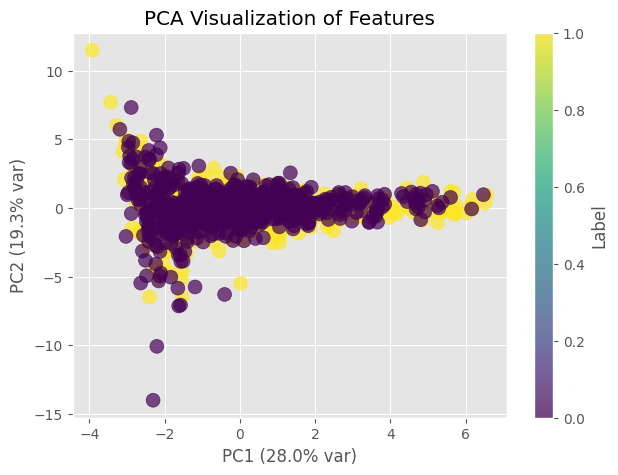

In [101]:
# Select numeric features only
features = Data.drop(columns=["text_content", "content_type", "label"])
features = features.select_dtypes(include=["float64", "int64"])

# Standardize
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# PCA to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

plt.figure(figsize=(7,5))
plt.scatter(pca_result[:,0], pca_result[:,1], 
            c=Data["label"], cmap="viridis", s=100, alpha=0.7)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA Visualization of Features")
plt.colorbar(label="Label")
plt.show()

PCA visualisation shows what the correlation matrix was alluding to, using the existing feauters artificial text is virtually imposible to defirentiate from human, but here is where preproccesing comes into play...